In [1]:
import base64
from io import BytesIO
from PIL import Image
from langchain_ollama import ChatOllama
import os
from tqdm import tqdm 
import shutil
from pdf2image import convert_from_path
from mm_embedding import mcdse
import pickle 
from langchain_core.messages import HumanMessage
from langchain_core.output_parsers import StrOutputParser

In [2]:
llm = ChatOllama(model='llama3.2-vision')
llm.invoke('what is 1 +1?')

AIMessage(content='The answer is: 2!', additional_kwargs={}, response_metadata={'model': 'llama3.2-vision', 'created_at': '2025-01-21T14:09:51.477876593Z', 'done': True, 'done_reason': 'stop', 'total_duration': 10121516751, 'load_duration': 8101894819, 'prompt_eval_count': 17, 'prompt_eval_duration': 950000000, 'eval_count': 8, 'eval_duration': 1068000000, 'message': Message(role='assistant', content='', images=None, tool_calls=None)}, id='run-17fd442e-d988-439f-87d2-0c6b2081029c-0', usage_metadata={'input_tokens': 17, 'output_tokens': 8, 'total_tokens': 25})

In [3]:
def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str

# Sample1

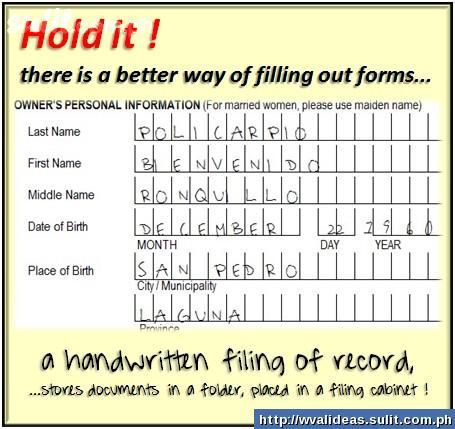

In [7]:
Image.open(f"./handwritten form.jpg")

In [6]:
image_b64 = convert_to_base64(
Image.open(f"./handwritten form.jpg") )
def prompt_func(data):
    text = data["text"]
    image = data["image"]
    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }
    content_parts = []
    text_part = {"type": "text", "text": text}
    content_parts.append(image_part)
    content_parts.append(text_part)
    return [HumanMessage(content=content_parts)]


chain = prompt_func | llm | StrOutputParser()
query_chain = chain.invoke(
    {"text": "who is it ", "image": image_b64}
)

print(query_chain)

It is for Policarpio Benvido Ronquillo.


In [15]:
image_b64 = convert_to_base64(
Image.open(f"./handwritten form.jpg") )
def prompt_func(data):
    text = data["text"]
    image = data["image"]
    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}",
    }
    content_parts = []
    text_part = {"type": "text", "text": text}
    content_parts.append(image_part)
    content_parts.append(text_part)
    return [HumanMessage(content=content_parts)]


chain = prompt_func | llm | StrOutputParser()
query_chain = chain.invoke(
    {"text": "when is the birthday ", "image": image_b64}
)

print(query_chain)

December 25, 1960.


# Example2

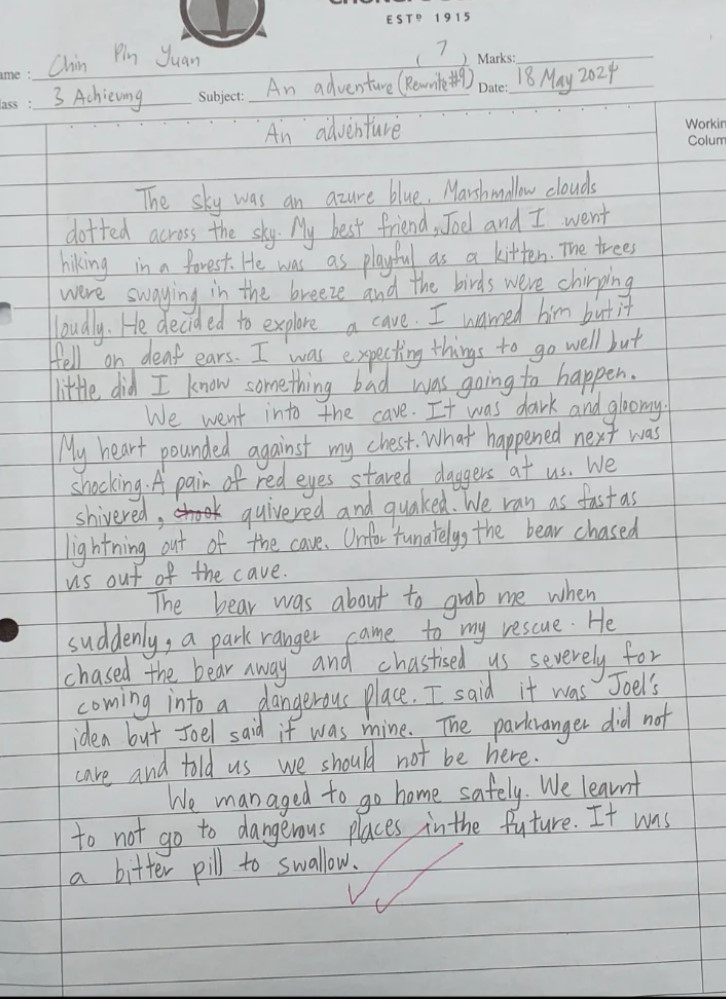

In [10]:
Image.open(f"./handwritten composition.jpg")

In [9]:
query_chain = chain.invoke(
    {"text": "extract all the texts", 
     "image": convert_to_base64(Image.open(f"./handwritten composition.jpg") )}
)
print(query_chain)

The text in this document is:
"The sky was an azure blue. Marshmallow clouds dotted across the sky. My best friend, Joel, and I went hiking in a forest. He was as playful as a kitten. The trees were swaying in the breeze and the birds chirping loudly. He decided to explore a cave. I warned him but it fell on deaf ears. I was expecting things to go well but little did I know something bad was going to happen. We went into the cave. It was dark and gloomy. My heart pounded against my chest. What happened next was shocking. A pair of red eyes stared daggers at us. We shivered, shook quivered and quaked. We ran as fast as lightning out of the cave. Unfortunately, the bear chased us out of the cave.

The bear was about to grab me when suddenly a park ranger came to my rescue. He chased the bear away and chastised us severely for coming into a dangerous place. I said it was Joel's idea but he said it was mine. The park ranger did not care and told us we should not be here. We managed to go h

# Example3

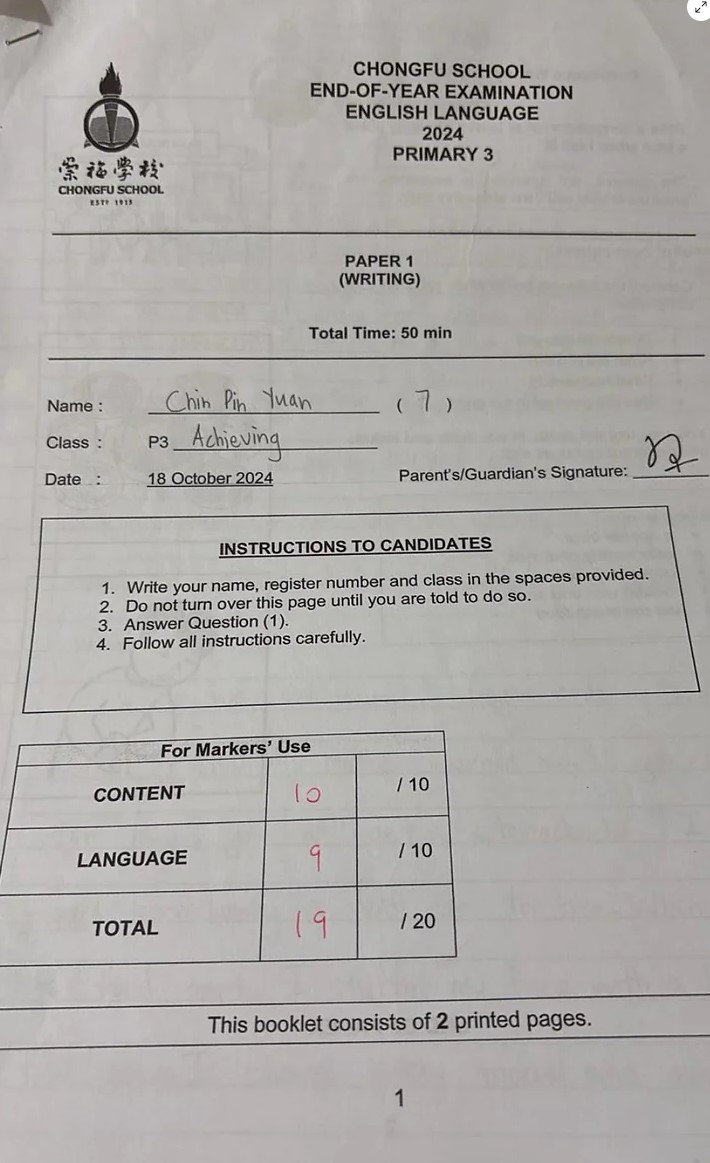

In [12]:
Image.open(f"./handwritten school transcript.jpg")

In [13]:
query_chain = chain.invoke(
    {"text": "who is the student", 
     "image": convert_to_base64(Image.open(f"./handwritten school transcript.jpg") )}
)
print(query_chain)

The student's name is Chin Pih Yuan.


In [14]:
query_chain = chain.invoke(
    {"text": "what is the school", 
     "image": convert_to_base64(Image.open(f"./handwritten school transcript.jpg") )}
)
print(query_chain)

The school is Chongfu School.


In [16]:
query_chain = chain.invoke(
    {"text": "language score of the student ", 
     "image": convert_to_base64(Image.open(f"./handwritten school transcript.jpg") )}
)
print(query_chain)

The student's language score is 9.
